In [2]:
# global imports
import os
from google.colab import drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import re
import nltk
import string

In [4]:
# load the dataset to the colab

drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Sem4/NLP/Final project/'

reviews = dataset_path + "yelp_academic_dataset_review.json"
business = dataset_path + "yelp_academic_dataset_business.json"


dataset = dataset_path + "yelp_data.json"
data_cleaned = dataset_path + 'yelp_clean.json'

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
# #getting only 20000 reviews
# df_reviews = pd.read_json(reviews,nrows=20000, lines=True)
# print(df_reviews.memory_usage(deep=True).sum())
# print(df_reviews.shape)

# Reading the business and review data

In [6]:
# reading business dataset
df_business = pd.read_json(business, lines=True)

In [7]:
df_business.shape

(150346, 14)

In [8]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
#get the number of businesses in each state
df_business['state'].value_counts()

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

In [10]:
#let's filter only states in california
df_bus_CA = df_business[df_business['state']=='CA']

In [11]:
df_bus_CA.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [12]:
#getting only restaurants in CA. filter based on category
df_bus_CA = df_bus_CA[~(df_bus_CA['categories'].isna())]
df_bus_CA = df_bus_CA[df_bus_CA['categories'].str.contains('Restaurants',case=False)]

In [13]:
# new shape
df_bus_CA.shape

(1161, 14)

In [14]:
df_bus_CA.city.value_counts()

Santa Barbara     767
Goleta            220
Carpinteria        81
Isla Vista         55
Montecito          27
Summerland          9
Santa  Barbara      1
Truckee             1
Name: city, dtype: int64

In [15]:
#getting total number of reviews in CA
df_bus_CA.review_count.sum()

206222

(0.0, 2000.0)

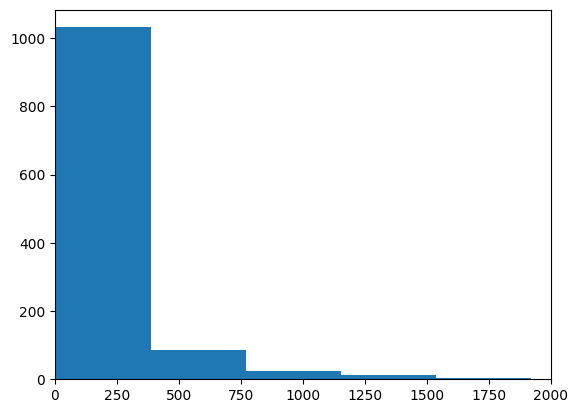

In [16]:
# get the distribution of review counts
plt.hist(df_bus_CA.review_count)
# left, right = plt.xlim()  # return the current xlim
plt.xlim(0,2000)

Most businesses have less than 250 reviews

In [17]:
# df_bus_CA[df_bus_CA['review_count']>=500].review_count.sum()

In [18]:
#let's take only restaurants with atleast 50 reviews so that we will have enough reviews for each topic later
df_bus_CA=df_bus_CA[df_bus_CA['review_count']>=50]

In [19]:
df_bus_CA.shape

(720, 14)

In [20]:
df_bus_CA.review_count.sum()

196708

In [21]:
df_bus_CA.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
431,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,CA,93117,34.412934,-119.855531,3.0,184,1,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [22]:
# we need only business_id and name from this dataframe
df_bus_CA=df_bus_CA[['business_id','name','city','review_count']]

In [23]:
df_bus_CA.isnull().sum() #drop null values if any

business_id     0
name            0
city            0
review_count    0
dtype: int64

In [24]:
df_bus_CA.head()

,business_id,name,city,review_count
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,Santa Barbara,389
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,Santa Barbara,2404
431,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,Santa Barbara,64
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,189
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Isla Vista,184


In [25]:
# read reviews dataset for only the business_id we already have

def filter_json_to_dataframe(file_name, ids_to_keep):
    filtered_data = []
    with open(file_name, "r") as f:
        for line in f:
            data = json.loads(line)
            if data["business_id"] in ids_to_keep:
                filtered_data.append(data)

    # Convert the filtered data to DataFrame
    df = pd.DataFrame(filtered_data)
    return df

In [26]:
#calling the function (took 3min to run)
ids_to_keep = df_bus_CA['business_id'].to_list()
df = filter_json_to_dataframe(reviews, ids_to_keep)

In [27]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
1,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4.0,0,0,0,"Yes, this is the only sushi place in town. How...",2013-09-04 03:48:20
2,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34
3,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5.0,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47
4,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,2016-05-31 02:14:54


In [28]:
df.shape

(201983, 9)

In [30]:
# we need only business_id, stars, useful, funny, cool, text in this df
df = df[['business_id', 'text', 'stars', 'useful', 'funny', 'cool']]

In [31]:
df.head()

,business_id,text,stars,useful,funny,cool
0,gebiRewfieSdtt17PTW6Zg,Had a party of 6 here for hibachi. Our waitres...,3.0,0,0,0
1,vC2qm1y3Au5czBtbhc-DNw,"Yes, this is the only sushi place in town. How...",4.0,0,0,0
2,bbEXAEFr4RYHLlZ-HFssTA,"Great burgers,fries and salad! Burgers have a...",5.0,0,0,0
3,IDtLPgUrqorrpqSLdfMhZQ,What a great addition to the Funk Zone! Grab ...,5.0,0,0,0
4,SZU9c8V2GuREDN5KgyHFJw,We were a bit weary about trying the Shellfish...,5.0,0,0,0


In [32]:
df_bus_CA.head()

,business_id,name,city,review_count
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,Santa Barbara,389
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,Santa Barbara,2404
431,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,Santa Barbara,64
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,189
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Isla Vista,184


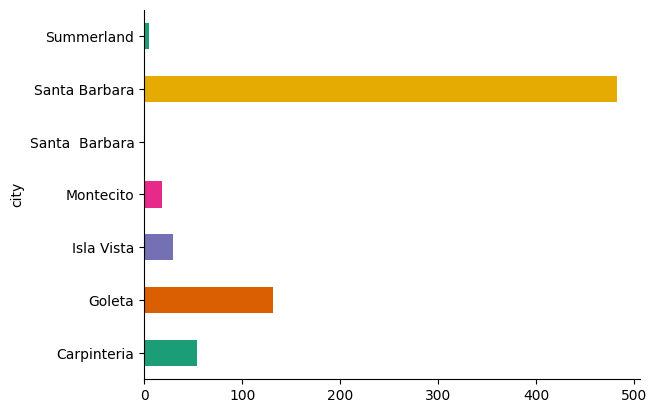

In [69]:
# @title city

from matplotlib import pyplot as plt
import seaborn as sns
df_bus_CA.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1]:
# # @title review_count

# from matplotlib import pyplot as plt
# df_bus_CA['review_count'].plot(kind='hist', bins=20, title='review_count')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
# merging business names to df_reviews
df_final = pd.merge(df, df_bus_CA, how='inner', on='business_id')
df_final.head()

,business_id,text,stars,useful,funny,cool,name,city,review_count
0,gebiRewfieSdtt17PTW6Zg,Had a party of 6 here for hibachi. Our waitres...,3.0,0,0,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488
1,gebiRewfieSdtt17PTW6Zg,"Sat down over a half hour, only miso and drink...",1.0,0,2,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488
2,gebiRewfieSdtt17PTW6Zg,Not bad. Sushi roll was good but options were ...,3.0,9,4,6,Hibachi Steak House & Sushi Bar,Santa Barbara,488
3,gebiRewfieSdtt17PTW6Zg,I'm very picky when it comes to Sushi. Quality...,5.0,1,0,1,Hibachi Steak House & Sushi Bar,Santa Barbara,488
4,gebiRewfieSdtt17PTW6Zg,Even though the sushi masters are not actually...,4.0,0,0,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488


In [34]:
df_final.isnull().sum()

business_id     0
text            0
stars           0
useful          0
funny           0
cool            0
name            0
city            0
review_count    0
dtype: int64

In [35]:
df_final.describe()

,stars,useful,funny,cool,review_count
count,201983.000000,201983.000000,201983.000000,201983.000000,201983.000000
mean,3.955387,0.930281,0.376715,0.539679,683.949694
std,1.330891,3.327647,2.090687,3.005587,735.273812
min,1.000000,0.000000,0.000000,0.000000,50.000000
25%,3.000000,0.000000,0.000000,0.000000,214.000000
50%,4.000000,0.000000,0.000000,0.000000,434.000000
75%,5.000000,1.000000,0.000000,0.000000,897.000000
max,5.000000,181.000000,134.000000,184.000000,3834.000000


In [37]:
df_final.shape

(201983, 9)

201983 reviews in total

In [38]:
memory_usage_bytes = df_final.memory_usage(deep=True).sum()

# Convert bytes to megabytes (MB)
memory_usage_mb = memory_usage_bytes / (1024 * 1024)

print("DataFrame size:", memory_usage_mb, "MB")

DataFrame size: 161.21418380737305 MB


In [51]:
#saving the dataframe as csv
df_final.to_csv('/content/drive/MyDrive/Sem4/NLP/Final project/reviews_CA.csv',index=False)

# Cleaning the review text

In [52]:
reviews_CA = dataset_path + "reviews_CA.csv"
df = pd.read_csv(reviews_CA)

In [53]:
# getting stop_words from nltk and initializing a lemmatizer
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "gonna": "going to",
    "gotta": "got to",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'll": "that will",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where will",
    "where's": "where is",
    "who'd": "who did",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why'll": "why will",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

In [54]:
def cleanse_data(d):

  #convert to lower case
  o = d.lower()

  # replace contractions with full forms
  for j in contraction_mapping.keys():
    o = o.replace(j, contraction_mapping[j])

  # replace extra white spaces, numbers and special characters
  o = re.sub(r'\s+', ' ', o)
  o = re.sub(r'[^a-zA-Z\s]', '', o)

  # remove all new lines
  o = o.replace("\n", "")

  # remove stop words and lemmatize the tokens
  tokens = o.split()
  cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  o = ' '.join(cleaned_tokens)

  # remove punctuation
  o = o.translate(str.maketrans('', '', string.punctuation))
  return o

In [55]:
df["text"] = df["text"].apply(cleanse_data)

In [56]:
df.head()

,business_id,text,stars,useful,funny,cool,name,city,review_count
0,gebiRewfieSdtt17PTW6Zg,party hibachi waitress brought separate sushi ...,3.0,0,0,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488
1,gebiRewfieSdtt17PTW6Zg,sat half hour miso drink served waiting actual...,1.0,0,2,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488
2,gebiRewfieSdtt17PTW6Zg,bad sushi roll good option limited hibachi gri...,3.0,9,4,6,Hibachi Steak House & Sushi Bar,Santa Barbara,488
3,gebiRewfieSdtt17PTW6Zg,im picky come sushi quality fish ingredient im...,5.0,1,0,1,Hibachi Steak House & Sushi Bar,Santa Barbara,488
4,gebiRewfieSdtt17PTW6Zg,even though sushi master actually asian make g...,4.0,0,0,0,Hibachi Steak House & Sushi Bar,Santa Barbara,488


In [57]:
df.to_csv('/content/drive/MyDrive/Sem4/NLP/Final project/cleaned_reviews.csv',index=False)

# Topic modeling

In [63]:
import time
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

In [70]:
df = pd.read_csv('/content/drive/MyDrive/Sem4/NLP/Final project/cleaned_reviews.csv')

### Algorithm 1: LDA with Gensim

In [59]:
# Preprocess the documents
processed_docs = [preprocess_string(doc) for doc in df['text'].to_list()]

# Create a dictionary from the processed documents
dictionary = corpora.Dictionary(processed_docs)

In [60]:
# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [61]:
# Train the LDA model -- took 15mins
start_time = time.time()
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)
end_time = time.time()

#elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print("Time taken for training LDA model:", elapsed_time, "seconds")

In [62]:
# Print the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {topic_words}")

Topic 1: 0.026*"great" + 0.022*"food" + 0.017*"place" + 0.015*"servic" + 0.014*"good" + 0.012*"love" + 0.011*"delici" + 0.010*"amaz" + 0.010*"santa" + 0.009*"barbara"
Topic 2: 0.020*"good" + 0.014*"place" + 0.014*"order" + 0.013*"chicken" + 0.012*"like" + 0.012*"food" + 0.010*"flavor" + 0.010*"sandwich" + 0.010*"salad" + 0.008*"sauc"
Topic 3: 0.018*"order" + 0.018*"food" + 0.013*"time" + 0.011*"servic" + 0.010*"ask" + 0.010*"tabl" + 0.010*"wait" + 0.009*"like" + 0.009*"place" + 0.008*"restaur"


In [64]:
# Get the topic distribution for a specific document
doc_id = 0  # Index of the document
doc_topics = lda_model.get_document_topics(corpus[doc_id])
print(f"Topic distribution for document {doc_id + 1}: {doc_topics}")

Topic distribution for document 1: [(0, 0.07844035), (1, 0.26691434), (2, 0.6546453)]


In [66]:
df['text'][0]

'party hibachi waitress brought separate sushi order one plate could really tell forgot several item order understand making mistake restaraunt really quiet kind surprised usually hibachi fun lively experience cook said maybe three word cooked well name francisco service fishy food pretty good im hoping night money would go back'

In [ ]:
# save the model


### Algorithm 2: Non-negative matrix factorization(NMF)

### Algorithm 3: Guassian Mixture Model

### Algorithm 4: BERTopic

# Old code --

In [5]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "gonna": "going to",
    "gotta": "got to",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'll": "that will",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where will",
    "where's": "where is",
    "who'd": "who did",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why'll": "why will",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

In [ ]:
# **Note:** Only for one-time execution

# Condense the dataset to only Restuarents and Food stalls


food_related_items = ['Chicken Wings', 'Bakeries', 'Creperies', 'Asian Fusion', 'Dumplings', 'Chocolatiers & Shops', 'Indian', 'Hot Tub & Pool', 'Ethiopian', 'Hawaiian', 'Poke', 'Soup', 'Vietnamese', 'Waffles', 'Falafel', 'Vegetarian', 'Cheesesteaks', 'Caribbean', 'Pita', 'Sushi Bars', 'Soup', 'Halal', 'Turkish', 'Chinese', 'Japanese Curry', 'Breweries', 'Taiwanese', 'Russian', 'Thai', 'Afghan', 'Tex-Mex', 'Iberian', 'Peruvian', 'Salvadoran', 'Laotian', 'Korean', 'Mexican', 'Dim Sum', 'Hakka', 'Venezuelan', 'Pakistani', 'Malaysian', 'Brazilian', 'Colombian', 'Cajun/Creole', 'Bubble Tea', 'Kebab', 'Trinidadian', 'Cambodian', 'Japanese', 'Tapas Bars', 'Tapas/Small Plates', 'Greek', 'restaurants', 'food']

food_related_business_ids = {}
with open(business, "r") as f:
  for i in f:
    json_data = json.loads(i)
    if json_data["categories"] != None:
      for j in food_related_items:
        if j in json_data["categories"]:
          food_related_business_ids[json_data["business_id"]] = json_data["name"]


def filter_specific_ids(file_name, out_file_name):
    out_file = open(out_file_name, "w+")
    start = True
    with open(file_name, "r") as f:
        out_file.write('[')
        for i in f:
            if json.loads(i)["business_id"] in food_related_business_ids:
              if start:
                  start = False
              else:
                  out_file.write(",")
              data = json.loads(i)
              data["business_name"] = food_related_business_ids[data["business_id"]]
              del data["review_id"]
              del data["user_id"]
              del data["business_id"]
              del data["date"]
              out_file.write(json.dumps(data))
    out_file.write(']')
    out_file.close()


filter_specific_ids(reviews, dataset)

In [ ]:
# **Note:** Only for one-time execution

# cleanse the data
dataframe = pd.read_json(dataset)
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

def cleanse_data(d):

  #convert to lower case
  o = d.lower()

  # replace contractions with full forms
  for j in contraction_mapping.keys():
    o = o.replace(j, contraction_mapping[j])

  # replace extra white spaces, special characters
  o = re.sub(r'\s+', ' ', o)
  o = re.sub(r'[^a-zA-Z0-9\s]', '', o)

  # remove all new lines
  o = o.replace("\n", "")

  # remove stop words and lemmatize the tokens
  tokens = o.split()
  cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  o = ' '.join(cleaned_tokens)

  # remove punctuation
  o = o.translate(str.maketrans('', '', string.punctuation))
  return o

dataframe["text"] = dataframe["text"].apply(cleanse_data)
dataframe.to_json(data_cleaned)

In [ ]:
# Run to load the dataset

json_data = pd.read_json(data_cleaned)
print(json_data)

         stars  useful  funny  cool  \
0            5       1      0     1   
1            1       1      2     1   
2            3       0      0     0   
3            4       0      2     0   
4            5       0      0     0   
...        ...     ...    ...   ...   
2693380      3       1      0     0   
2693381      3       2      0     2   
2693382      4       2      0     1   
2693383      1       0      0     0   
2693384      4       3      0     2   

                                                      text  \
0        wow yummy different delicious favorite lamb cu...   
1        long term frequent customer establishment went...   
2        party 6 hibachi waitress brought separate sush...   
3        bun make sonoran dog like snuggie pup first se...   
4        tremendous service big shout douglas complemen...   
...                                                    ...   
2693380  excited food saw unfortunately place close ear...   
2693381  later yelp ive love place 

In [ ]:
## Topic modelling